In [1]:
# Orignial Notebook: https://github.com/MITESHPUTHRANNEU/Speech-Emotion-Analyzer/blob/master/final_results_gender_test.ipynb
# This notebook author: Reza Chu
# Last Editing Date: 31st May 2019

## Python
import os
import random
import sys

import IPython
from IPython.display import Audio
from IPython.display import Image
import matplotlib.pyplot as plt

## Package
import glob 
import keras
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as py
import plotly.tools as tls
import seaborn as sns
import scipy.io.wavfile
import tensorflow as tf
py.init_notebook_mode(connected=True)

## Keras
from keras import regularizers
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from keras.callbacks import  History, ReduceLROnPlateau, CSVLogger
from keras.models import Model, Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical

## Sklearn
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

## Rest
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
from tqdm import tqdm

input_duration=3
# % pylab inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#only SAVEE data set
import time
import os
import librosa
from librosa import display
import matplotlib.pyplot as plt
#sad/sa2dc.avi
labels = []
video_name=[]
audio_name=[]
count=0
start_time = time.time()
CLASSES_LIST=['KL','JK ','JE','DC']
DATASET_DIR = '/content/drive/My Drive/SAVEE'
emotion_LIST = ["neutral", "calm", "happy", "sad","angry","fearful"]
for class_index, class_name in enumerate(CLASSES_LIST):
#for subdir, dirs, files in os.walk(path):
  print(class_name)
  #dir=subdir.split('/')[4]
  #print(dir)
  
  files= os.listdir(os.path.join(DATASET_DIR, class_name))
  for file in files:
      try:
        print(file)
        #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
        #X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
        #mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
        count +=1
        # The instruction below converts the labels (from 1 to 8) to a series from 0 to 7
        # This is because our predictor needs to start from 0 otherwise it will try to predict also 0.
        #file = int(file[7:8]) - 1 
        #0 = neutral, 1 = happy, 2 = sad, 3 = angry, 4 = fearful, 6 = disgust, 7 = surprised
        if file.startswith('a'):
            emotion=3
       # elif file.startswith('d'):
         #   emotion=6
        elif file.startswith('f'):
            emotion=4
        elif file.startswith('h'):
            emotion=1
        elif file.startswith('n'):
            emotion=0
        elif file.startswith('sa'):
            emotion=2
       # elif file.startswith('su'):
        #    emotion=7
        else:
            continue
        v=emotion_LIST[emotion]+'/'+file.split('.')[0]+class_name.lower()+'.avi'
        video_name.append(v)
        a=class_name+'/'+file

        audio_name.append(a)
        #arr = mfccs, emotion
        labels.append(emotion)
      # If the file is not valid, skip it
      except ValueError:
        continue

print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))

KL
a01.wav
a02.wav
a03.wav
a04.wav
a05.wav
a07.wav
a10.wav
a09.wav
a08.wav
a06.wav
a15.wav
a14.wav
a13.wav
a12.wav
a11.wav
d05.wav
d04.wav
d03.wav
d02.wav
d01.wav
d10.wav
d09.wav
d08.wav
d07.wav
d06.wav
d15.wav
d14.wav
d13.wav
d12.wav
d11.wav
f05.wav
f04.wav
f03.wav
f02.wav
f01.wav
f10.wav
f09.wav
f08.wav
f07.wav
f06.wav
f15.wav
f14.wav
f13.wav
f12.wav
f11.wav
h05.wav
h04.wav
h03.wav
h02.wav
h01.wav
h10.wav
h09.wav
h08.wav
h07.wav
h06.wav
h15.wav
h14.wav
h13.wav
h12.wav
h11.wav
sa05.wav
sa04.wav
sa03.wav
sa02.wav
sa01.wav
sa10.wav
sa09.wav
sa08.wav
sa07.wav
sa06.wav
sa11.wav
sa14.wav
sa13.wav
sa12.wav
sa15.wav
su05.wav
su03.wav
su02.wav
su01.wav
su10.wav
su09.wav
su08.wav
su07.wav
su06.wav
su15.wav
su14.wav
su13.wav
su12.wav
su11.wav
su04.wav
n01.wav
n05.wav
n04.wav
n03.wav
n02.wav
n10.wav
n09.wav
n08.wav
n07.wav
n06.wav
n20.wav
n19.wav
n18.wav
n17.wav
n16.wav
n25.wav
n24.wav
n23.wav
n22.wav
n21.wav
n30.wav
n29.wav
n28.wav
n27.wav
n26.wav
n15.wav
n14.wav
n13.wav
n12.wav
n11.wav
JK 
a01

In [3]:
audio_name

['KL/a01.wav',
 'KL/a02.wav',
 'KL/a03.wav',
 'KL/a04.wav',
 'KL/a05.wav',
 'KL/a07.wav',
 'KL/a10.wav',
 'KL/a09.wav',
 'KL/a08.wav',
 'KL/a06.wav',
 'KL/a15.wav',
 'KL/a14.wav',
 'KL/a13.wav',
 'KL/a12.wav',
 'KL/a11.wav',
 'KL/f05.wav',
 'KL/f04.wav',
 'KL/f03.wav',
 'KL/f02.wav',
 'KL/f01.wav',
 'KL/f10.wav',
 'KL/f09.wav',
 'KL/f08.wav',
 'KL/f07.wav',
 'KL/f06.wav',
 'KL/f15.wav',
 'KL/f14.wav',
 'KL/f13.wav',
 'KL/f12.wav',
 'KL/f11.wav',
 'KL/h05.wav',
 'KL/h04.wav',
 'KL/h03.wav',
 'KL/h02.wav',
 'KL/h01.wav',
 'KL/h10.wav',
 'KL/h09.wav',
 'KL/h08.wav',
 'KL/h07.wav',
 'KL/h06.wav',
 'KL/h15.wav',
 'KL/h14.wav',
 'KL/h13.wav',
 'KL/h12.wav',
 'KL/h11.wav',
 'KL/sa05.wav',
 'KL/sa04.wav',
 'KL/sa03.wav',
 'KL/sa02.wav',
 'KL/sa01.wav',
 'KL/sa10.wav',
 'KL/sa09.wav',
 'KL/sa08.wav',
 'KL/sa07.wav',
 'KL/sa06.wav',
 'KL/sa11.wav',
 'KL/sa14.wav',
 'KL/sa13.wav',
 'KL/sa12.wav',
 'KL/sa15.wav',
 'KL/n01.wav',
 'KL/n05.wav',
 'KL/n04.wav',
 'KL/n03.wav',
 'KL/n02.wav',
 'KL/n10.w

In [4]:
video_name

['sad/a01kl.avi',
 'sad/a02kl.avi',
 'sad/a03kl.avi',
 'sad/a04kl.avi',
 'sad/a05kl.avi',
 'sad/a07kl.avi',
 'sad/a10kl.avi',
 'sad/a09kl.avi',
 'sad/a08kl.avi',
 'sad/a06kl.avi',
 'sad/a15kl.avi',
 'sad/a14kl.avi',
 'sad/a13kl.avi',
 'sad/a12kl.avi',
 'sad/a11kl.avi',
 'angry/f05kl.avi',
 'angry/f04kl.avi',
 'angry/f03kl.avi',
 'angry/f02kl.avi',
 'angry/f01kl.avi',
 'angry/f10kl.avi',
 'angry/f09kl.avi',
 'angry/f08kl.avi',
 'angry/f07kl.avi',
 'angry/f06kl.avi',
 'angry/f15kl.avi',
 'angry/f14kl.avi',
 'angry/f13kl.avi',
 'angry/f12kl.avi',
 'angry/f11kl.avi',
 'calm/h05kl.avi',
 'calm/h04kl.avi',
 'calm/h03kl.avi',
 'calm/h02kl.avi',
 'calm/h01kl.avi',
 'calm/h10kl.avi',
 'calm/h09kl.avi',
 'calm/h08kl.avi',
 'calm/h07kl.avi',
 'calm/h06kl.avi',
 'calm/h15kl.avi',
 'calm/h14kl.avi',
 'calm/h13kl.avi',
 'calm/h12kl.avi',
 'calm/h11kl.avi',
 'happy/sa05kl.avi',
 'happy/sa04kl.avi',
 'happy/sa03kl.avi',
 'happy/sa02kl.avi',
 'happy/sa01kl.avi',
 'happy/sa10kl.avi',
 'happy/sa09kl.avi'

In [5]:
seed_constant = np.random.randint(1000000)
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)
seed_constant

588156

In [6]:
from sklearn.model_selection import train_test_split
# Split the Data into Train ( 80% ) and Test Set ( 20% ).
audio_train, audio_test, labels_train, labels_test,video_train_path,video_test_path = train_test_split(audio_name, labels,video_name,
                                                                            test_size = 0.10, shuffle = True,
                                                                            random_state = seed_constant)

In [7]:

# Split train the Data into Train ( 80% ) and valid Set ( 20% ).
audio_train, audio_valid, labels_train, labels_valid,video_train_path,video_valid_path = train_test_split(audio_train, labels_train,video_train_path,
                                                                            test_size = 0.11, shuffle = True,
                                                                            random_state = seed_constant)

In [8]:
#288,36,36
len(audio_train),len(audio_valid),len(audio_test),len(labels_train),len(labels_valid),len(labels_test),len(video_train_path),len(video_valid_path),len(video_test_path)

(288, 36, 36, 288, 36, 36, 288, 36, 36)

In [9]:
import joblib

save_dir = '/content/drive/My Drive/fusion/savee/audio/data_set/expert1'

savedvX = joblib.dump(labels_train, os.path.join(save_dir, 'train/labels_train'))
savedvX = joblib.dump(labels_test, os.path.join(save_dir, 'test/labels_test'))
savedvX = joblib.dump(labels_valid, os.path.join(save_dir, 'valid/labels_valid'))
savedvX = joblib.dump(video_train_path, os.path.join(save_dir, 'train/video_train_path'))
savedvX = joblib.dump(video_test_path, os.path.join(save_dir, 'test/video_test_path'))
savedvX = joblib.dump(video_valid_path, os.path.join(save_dir, 'valid/video_valid_path'))

In [10]:
#radvass speech and song
import time
import os
import librosa
from librosa import display
import matplotlib.pyplot as plt
DATASET_DIR = '/content/drive/My Drive/SAVEE/'
count=0
x_test = []
X_valid=[]
start_time = time.time()

for path in audio_valid :
      try:
        count +=1
        #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
        X, sample_rate = librosa.load(DATASET_DIR+path, res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
        # The instruction below converts the labels (from 1 to 8) to a series from 0 to 7
        # This is because our predictor needs to start from 0 otherwise it will try to predict also 0.
        #emo = int(file[7:8]) - 1 
        #arr = X, emo
        X_valid.append(mfccs)
      # If the file is not valid, skip it
      except ValueError:
        continue

for path in audio_test:
      try:
        count +=1
        #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
        X, sample_rate = librosa.load(DATASET_DIR+path, res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
        # The instruction below converts the labels (from 1 to 8) to a series from 0 to 7
        # This is because our predictor needs to start from 0 otherwise it will try to predict also 0.
        #emo = int(file[7:8]) - 1 
        #arr = X, emo
        x_test.append(mfccs)
      # If the file is not valid, skip it
      except ValueError:
        continue
print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))


--- Data loaded. Loading time: 6.922230243682861 seconds ---


In [11]:
X_valid=np.asarray(X_valid)
x_test=np.asarray(x_test)
X_valid.shape,x_test.shape

((36, 40), (36, 40))

In [12]:
train_lst=[]
for i in range(len(audio_train)):
  X, sample_rate = librosa.load(DATASET_DIR+audio_train[i], res_type='kaiser_fast')
  emo=labels_train[i]
  x=X
  arr=x,emo
  train_lst.append(arr)
  x=librosa.effects.time_stretch(X,0.5)
  arr=x,emo
  train_lst.append(arr)
  x=librosa.effects.time_stretch(X,1.5)
  arr=x,emo
  train_lst.append(arr)
  x=librosa.effects.pitch_shift(X,sample_rate,2)
  arr=x,emo
  train_lst.append(arr)

In [13]:
x_train, y_train = zip(*train_lst)

In [14]:
x_train=np.asarray(x_train)
y_train=np.asarray(y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



In [15]:
y_train.shape

(1152,)

In [16]:
X_train=[]
for i in range(x_train.size):
  X_train.append(np.mean(librosa.feature.mfcc(y=x_train[i], sr=sample_rate, n_mfcc=40).T,axis=0))

In [17]:
X_train=np.asarray(X_train)
labels_valid=np.asarray(labels_valid)
labels_test=np.asarray(labels_test)
X_train.shape,y_train.shape,X_valid.shape,labels_valid.shape,x_test.shape,labels_test.shape

((1152, 40), (1152,), (36, 40), (36,), (36, 40), (36,))

In [18]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras import optimizers
from keras.models import InputLayer

model = Sequential(InputLayer((40,1)))
model.add(BatchNormalization())

model.add(Conv1D(128, 12,padding='same', ))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(5)))


model.add(Conv1D(256,12,padding='same',))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(MaxPooling1D(pool_size=(5)))

model.add(Flatten())
model.add(Dense(5))
model.add(Activation('softmax'))

opt = tf.keras.optimizers.Adam(lr=0.0002)
#opt = tf.keras.optimizers.RMSprop(lr=0.0001, rho=0.9, epsilon=1e-07, decay=0.0)
#opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.0, decay=0.0, nesterov=False)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 40, 1)            4         
 ormalization)                                                   
                                                                 
 conv1d (Conv1D)             (None, 40, 128)           1664      
                                                                 
 batch_normalization_1 (Batc  (None, 40, 128)          512       
 hNormalization)                                                 
                                                                 
 activation (Activation)     (None, 40, 128)           0         
                                                                 
 dropout (Dropout)           (None, 40, 128)           0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 8, 128)           0

In [20]:
# Create an Instance of Early Stopping Callback.
#early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 25, mode = 'min', restore_best_weights = True)
 
# Compile the model and specify loss function, optimizer and metrics to the model.
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = opt, metrics = ["accuracy"])

# Start training the model.
cnnhistory = model.fit(X_train, y_train, epochs = 200, batch_size = 16 ,
                                             #shuffle = True,
                        validation_data=(X_valid, labels_valid))
                                             #, callbacks = [early_stopping_callback])

Epoch 1/200
72/72 [==============================] - 3s 9ms/step - loss: 1.7103 - accuracy: 0.3724 - val_loss: 1.7724 - val_accuracy: 0.1667
Epoch 2/200
72/72 [==============================] - 0s 5ms/step - loss: 1.3080 - accuracy: 0.4939 - val_loss: 2.2876 - val_accuracy: 0.1667
Epoch 3/200
72/72 [==============================] - 0s 5ms/step - loss: 1.0945 - accuracy: 0.5972 - val_loss: 2.7363 - val_accuracy: 0.1667
Epoch 4/200
72/72 [==============================] - 0s 5ms/step - loss: 1.0753 - accuracy: 0.6042 - val_loss: 2.5400 - val_accuracy: 0.1667
Epoch 5/200
72/72 [==============================] - 0s 5ms/step - loss: 0.9859 - accuracy: 0.6467 - val_loss: 2.5727 - val_accuracy: 0.1667
Epoch 6/200
72/72 [==============================] - 0s 5ms/step - loss: 0.8594 - accuracy: 0.6589 - val_loss: 2.2445 - val_accuracy: 0.1667
Epoch 7/200
72/72 [==============================] - 0s 5ms/step - loss: 0.8341 - accuracy: 0.6701 - val_loss: 1.3648 - val_accuracy: 0.4444
Epoch 8/200
7

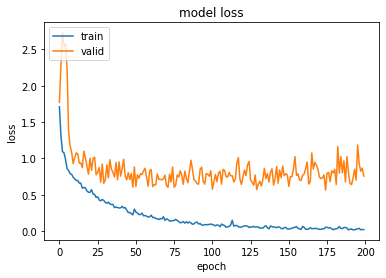

In [21]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

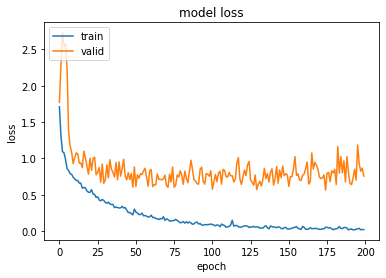

In [22]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [23]:
loss, acc = model.evaluate(x_test, labels_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

2/2 [==============================] - 0s 7ms/step - loss: 0.4045 - accuracy: 0.9167
Restored model, accuracy: 91.67%


In [24]:
#predictions = model.predict_classes(x_testcnn)
predictions = model.predict(x_test)
predictions

array([[9.83537972e-01, 6.11236419e-06, 1.64529961e-02, 1.90891751e-06,
        1.03955927e-06],
       [3.07560753e-04, 1.91580461e-04, 2.43829589e-07, 9.99480307e-01,
        2.03359414e-05],
       [5.18385150e-07, 5.30504494e-08, 9.98173594e-01, 1.54579640e-04,
        1.67128490e-03],
       [9.99433219e-01, 5.66782205e-07, 5.29034762e-04, 7.02784009e-09,
        3.71808746e-05],
       [9.39853311e-01, 9.33100000e-06, 5.49240112e-02, 5.19892573e-03,
        1.44456462e-05],
       [2.02675672e-08, 7.62617201e-05, 1.79393556e-09, 9.99911308e-01,
        1.23546697e-05],
       [3.09937546e-04, 7.80249957e-06, 9.98606741e-01, 3.38483915e-05,
        1.04176009e-03],
       [9.85105515e-01, 1.26594955e-07, 1.48928035e-02, 6.26197272e-09,
        1.53779081e-06],
       [9.99996066e-01, 7.49537179e-08, 3.72358704e-06, 5.29848521e-08,
        7.64587560e-11],
       [9.19728756e-01, 4.60405818e-06, 8.02234188e-02, 1.23432491e-08,
        4.31530498e-05],
       [8.69463205e-01, 1.9933

In [25]:

df_audio_test = pd.DataFrame(predictions,columns=["OA_"+str(i) for i in range(5)])


In [26]:
labels_test

array([0, 3, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 4, 1, 0, 3, 3, 0, 0, 0, 0, 1,
       4, 3, 0, 1, 0, 0, 3, 1, 0, 0, 3, 0, 2, 2])

In [27]:
new_Ytest = labels_test.astype(int)
new_Ytest

array([0, 3, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 4, 1, 0, 3, 3, 0, 0, 0, 0, 1,
       4, 3, 0, 1, 0, 0, 3, 1, 0, 0, 3, 0, 2, 2])

In [28]:
preds1=predictions.argmax(axis=1)
preds1

array([0, 3, 2, 0, 0, 3, 2, 0, 0, 0, 0, 0, 4, 1, 0, 3, 3, 0, 0, 0, 0, 1,
       4, 3, 0, 1, 0, 0, 3, 1, 0, 0, 3, 0, 0, 2])

In [29]:
abc = preds1.astype(int).flatten()
from sklearn.metrics import confusion_matrix
c = confusion_matrix(new_Ytest, abc) 
c

array([[18,  0,  0,  0,  0],
       [ 0,  4,  0,  1,  0],
       [ 2,  0,  3,  0,  0],
       [ 0,  0,  0,  6,  0],
       [ 0,  0,  0,  0,  2]])

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       1.00      0.80      0.89         5
           2       1.00      0.60      0.75         5
           3       0.86      1.00      0.92         6
           4       1.00      1.00      1.00         2

    accuracy                           0.92        36
   macro avg       0.95      0.88      0.90        36
weighted avg       0.93      0.92      0.91        36

----accuracy score 91.66666666666666 ----


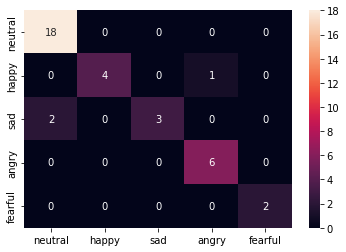

In [30]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sn

print(classification_report(labels_test,abc))

acc = float(accuracy_score(labels_test,abc))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(labels_test,abc)
#df_cm = pd.DataFrame(cm)
class_names = ['neutral', 'happy','sad','angry', 'fearful' ]
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names,)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

In [31]:
model.save('/content/drive/My Drive/fusion/savee/audio/model/expert1/best_CNN_model')
print("MODEL SAVED")

INFO:tensorflow:Assets written to: /content/drive/My Drive/fusion/savee/audio/model/expert1/best_CNN_model/assets
MODEL SAVED


In [32]:
model_file_name = f'/content/drive/My Drive/fusion/savee/audio/model/expert1/best_CNN_model___Loss_{loss}___Accuracy_{acc}.h5'

# Save the Model.
model.save(model_file_name)

In [33]:
# serialize model to JSON
model_json = model.to_json()
with open("/content/drive/My Drive/fusion/savee/audio/model/expert1/best_CNN_model.json", "w") as json_file:
    json_file.write(model_json)

In [34]:
count=0
new_x_train=[]
for path in audio_train :
      try:
        count +=1
        #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
        X, sample_rate = librosa.load(DATASET_DIR+path, res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
        # The instruction below converts the labels (from 1 to 8) to a series from 0 to 7
        # This is because our predictor needs to start from 0 otherwise it will try to predict also 0.
        #emo = int(file[7:8]) - 1 
        #arr = X, emo
        new_x_train.append(mfccs)
      # If the file is not valid, skip it
      except ValueError:
        continue
print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))

--- Data loaded. Loading time: 307.88195061683655 seconds ---


In [35]:
new_x_train=np.asarray(new_x_train)
prediction_train = model.predict(new_x_train)
prediction_train

array([[4.0156906e-06, 1.2235508e-02, 3.4994689e-06, 9.8775536e-01,
        1.6637740e-06],
       [7.3231902e-08, 9.9217767e-01, 2.6037515e-06, 7.8172097e-03,
        2.3665209e-06],
       [9.9999964e-01, 3.1105343e-10, 3.3079732e-07, 4.4367125e-11,
        9.3500771e-13],
       ...,
       [1.2860904e-04, 9.9867249e-01, 2.7703304e-06, 7.6535711e-04,
        4.3086233e-04],
       [1.5551095e-05, 1.6544557e-03, 9.6469250e-07, 1.7234206e-05,
        9.9831176e-01],
       [4.1764488e-05, 4.6737332e-06, 1.7016751e-07, 9.9990988e-01,
        4.3478838e-05]], dtype=float32)

In [36]:
df_audio_train = pd.DataFrame(prediction_train,columns=["OA_"+str(i) for i in range(5)])

In [37]:
prediction_valid = model.predict(X_valid)
prediction_valid

array([[8.98045823e-02, 7.58607030e-06, 9.01195228e-01, 3.14555666e-03,
        5.84705314e-03],
       [7.03287296e-05, 9.61285787e-06, 9.99546230e-01, 9.39661641e-06,
        3.64415726e-04],
       [9.99931574e-01, 4.49499247e-08, 3.57345493e-06, 6.48267742e-05,
        3.56961252e-08],
       [9.99982476e-01, 7.23650697e-12, 1.75467485e-05, 1.45089185e-08,
        8.57717009e-09],
       [9.02949978e-06, 2.49328434e-01, 2.45722204e-05, 7.50625372e-01,
        1.24902617e-05],
       [8.17242108e-05, 9.15755928e-01, 7.20439175e-08, 1.69690344e-02,
        6.71932548e-02],
       [3.14678203e-08, 1.01924306e-02, 6.88884165e-06, 9.73621845e-01,
        1.61788743e-02],
       [1.55519793e-08, 1.64673907e-07, 9.96639490e-01, 1.23125517e-07,
        3.36011522e-03],
       [4.80241375e-03, 2.22365452e-06, 3.28180683e-08, 9.95195329e-01,
        3.62869592e-08],
       [9.99926209e-01, 5.03489375e-08, 3.53547398e-06, 6.98256699e-05,
        4.32916579e-07],
       [7.93358386e-02, 7.0445

In [38]:
df_audio_valid = pd.DataFrame(prediction_valid,columns=["OA_"+str(i) for i in range(5)])

In [39]:
import joblib

save_dir = '/content/drive/My Drive/fusion/savee/audio/data_set/expert1'

savedvX = joblib.dump(df_audio_train, os.path.join(save_dir, 'train/predict_train'))
savedvX = joblib.dump(df_audio_test, os.path.join(save_dir, 'test/predict_test'))
savedvX = joblib.dump(df_audio_valid, os.path.join(save_dir, 'valid/predict_valid'))